In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchview import draw_graph
import torch.nn.functional as F
from torchvision import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from torchvision import datasets, transforms

# ANN

## Data Cleaning

### Data Analysis

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [3]:
import pandas as pd
df=pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df=df.dropna()
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [8]:
df.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [9]:
df=df.drop(336)

In [10]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Label Encoder

In [11]:
le = LabelEncoder()
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])

In [12]:
df.dtypes

species                int64
island                 int64
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

In [13]:
df.groupby('sex')['sex'].count()

sex
0    165
1    168
Name: sex, dtype: int64

In [14]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [15]:
features=['island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex']
features

['island',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

## Data Split

In [16]:
X=df[features]
Y=df['species']

In [17]:
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


In [18]:
Y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

### Standard Scaler

In [20]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Converting to Tensor

In [21]:
X_train_tensor=torch.FloatTensor(X_train)
X_test_tensor=torch.FloatTensor(X_test)
Y_train_tensor=torch.LongTensor(Y_train.values)
Y_test_tensor=torch.LongTensor(Y_test.values)

## ANN Building

In [22]:
class Species(nn.Module):
    def __init__(self,input_size):
        super().__init__()

        self.l1=nn.Linear(input_size,10)
        self.l2=nn.Linear(10,5)
        self.l3=nn.Linear(5,3)

        self.relu=nn.ReLU()

    def forward(self,x):
        x=self.relu(self.l1(x))
        x=self.relu(self.l2(x))
        x=self.l3(x)
        return x

In [23]:
X_train_tensor.shape

torch.Size([266, 6])


(process:4756): Pango-WARNING **: 01:16:01.754: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


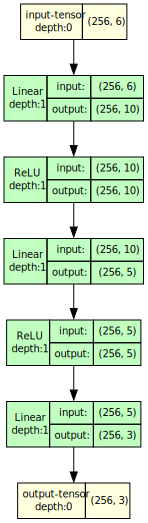

In [24]:
model=Species(X_train_tensor.shape[-1])
model_graph = draw_graph(model,input_size=(256,6))
model_graph.visual_graph

## ANN Evaluation

In [25]:
model = Species(X_train_tensor.shape[-1])
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adagrad(model.parameters(),lr=0.02)
Epochs=400
train_losses=[]
test_losses=[]
for epoch in range(Epochs):
    model.train()
    optimizer.zero_grad()
    train_output=model(X_train_tensor)
    loss=loss_fn(train_output,Y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_output=model(X_test_tensor)
        test_loss=loss_fn(test_output,Y_test_tensor)
        test_losses.append(test_loss.item())

    if epoch % 10==0:
        print(f'Train Loss: {loss}:.4f || Test Loss: {test_loss}:.4f')

Train Loss: 1.08052659034729:.4f || Test Loss: 1.0523065328598022:.4f
Train Loss: 0.7622129917144775:.4f || Test Loss: 0.7217140793800354:.4f
Train Loss: 0.4775538742542267:.4f || Test Loss: 0.45720967650413513:.4f
Train Loss: 0.31915614008903503:.4f || Test Loss: 0.31365588307380676:.4f
Train Loss: 0.22676105797290802:.4f || Test Loss: 0.2281404733657837:.4f
Train Loss: 0.1683642864227295:.4f || Test Loss: 0.17326757311820984:.4f
Train Loss: 0.13040949404239655:.4f || Test Loss: 0.13661548495292664:.4f
Train Loss: 0.10465236008167267:.4f || Test Loss: 0.11129624396562576:.4f
Train Loss: 0.08637439459562302:.4f || Test Loss: 0.09308785200119019:.4f
Train Loss: 0.07301424443721771:.4f || Test Loss: 0.07948236912488937:.4f
Train Loss: 0.06309587508440018:.4f || Test Loss: 0.06923184543848038:.4f
Train Loss: 0.055535927414894104:.4f || Test Loss: 0.06137145310640335:.4f
Train Loss: 0.04952472075819969:.4f || Test Loss: 0.05490231141448021:.4f
Train Loss: 0.0429796501994133:.4f || Test Los

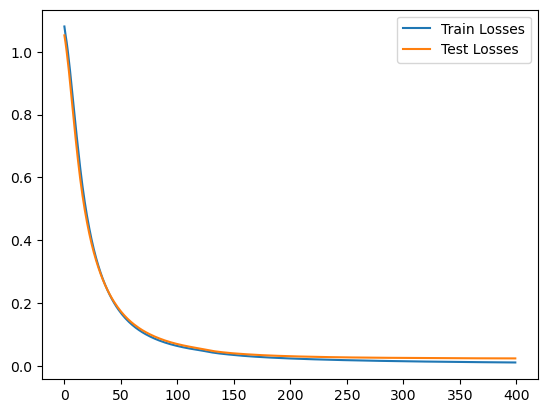

In [26]:
plt.plot(train_losses,label='Train Losses')
plt.plot(test_losses,label='Test Losses')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



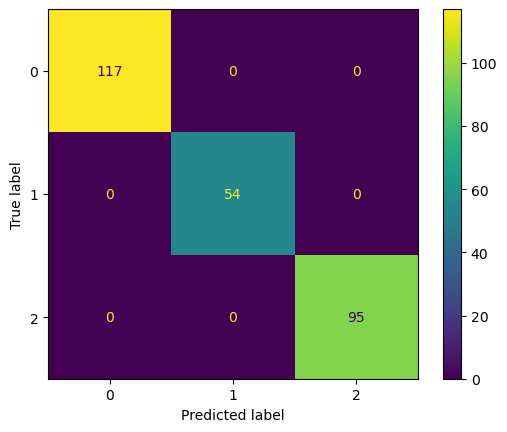

In [27]:
model.eval()
with torch.no_grad():
    output = model(X_train_tensor)
    _, predictions = torch.max(output,1)
    print(classification_report(Y_train_tensor,predictions))
    cm = confusion_matrix(Y_train_tensor,predictions)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



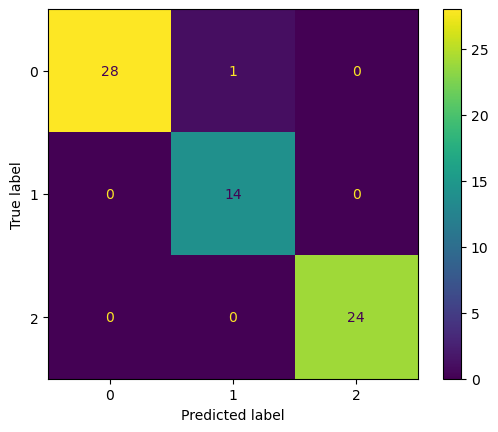

In [28]:
model.eval()
with torch.no_grad():
    output=model(X_test_tensor)
    _, predictions = torch.max(output,1)
    print(classification_report(Y_test_tensor,predictions))
    cm = confusion_matrix(Y_test_tensor,predictions)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

# CNN

## Reading Dataset + Preprocessing

In [29]:
transform=transforms.Compose([
    transforms.Resize((128,128))
])

train_dataset=datasets.ImageFolder(r"C:\Users\amits\Downloads\Dataset\train",transform=transform)
test_dataset=datasets.ImageFolder(r"C:\Users\amits\Downloads\Dataset\test",transform=transform)
valid_dataset=datasets.ImageFolder(r"C:\Users\amits\Downloads\Dataset\valid",transform=transform)

In [30]:
train_dataset.class_to_idx

{'1': 0, '2': 1, '3': 2}

In [31]:
train_dataset.classes

['1', '2', '3']

In [32]:
train_dataset[1]

(<PIL.Image.Image image mode=RGB size=128x128>, 0)

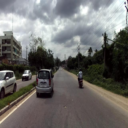

In [33]:
train_dataset[1][0]

In [34]:
train_dataset[1][1]

0

## Transformation

In [35]:
train_transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

train_dataset=datasets.ImageFolder(r"C:\Users\amits\Downloads\Dataset\train",transform=train_transform)
test_dataset=datasets.ImageFolder(r"C:\Users\amits\Downloads\Dataset\test",transform=transform)
valid_dataset=datasets.ImageFolder(r"C:\Users\amits\Downloads\Dataset\valid",transform=transform)

In [36]:
valid_dataset[0]

(tensor([[[ 0.2784,  0.3020,  0.4118,  ..., -0.0980, -0.0902, -0.0902],
          [ 0.3490,  0.3255,  0.2941,  ..., -0.0980, -0.0980, -0.0824],
          [ 0.3569,  0.3569,  0.3255,  ..., -0.0980, -0.0902, -0.0824],
          ...,
          [-0.6078, -0.5765, -0.6235,  ...,  0.7020,  0.7255,  0.7255],
          [-0.5922, -0.5373, -0.6863,  ...,  0.7020,  0.7333,  0.7255],
          [-0.6706, -0.6863, -0.6941,  ...,  0.7020,  0.7176,  0.7255]],
 
         [[ 0.0196,  0.0431,  0.1529,  ..., -0.2549, -0.2471, -0.2471],
          [ 0.0902,  0.0745,  0.0431,  ..., -0.2549, -0.2549, -0.2392],
          [ 0.1059,  0.1059,  0.0745,  ..., -0.2549, -0.2471, -0.2392],
          ...,
          [-0.6784, -0.6471, -0.6863,  ...,  0.9216,  0.9608,  0.9843],
          [-0.6863, -0.6235, -0.7725,  ...,  0.9216,  0.9686,  0.9843],
          [-0.7804, -0.8039, -0.8039,  ...,  0.9216,  0.9608,  0.9922]],
 
         [[-0.3098, -0.2863, -0.1765,  ..., -0.2627, -0.2549, -0.2549],
          [-0.2784, -0.2941,

In [37]:
valid_dataset[0][1]

0

In [38]:
valid_dataset[0][0]

tensor([[[ 0.2784,  0.3020,  0.4118,  ..., -0.0980, -0.0902, -0.0902],
         [ 0.3490,  0.3255,  0.2941,  ..., -0.0980, -0.0980, -0.0824],
         [ 0.3569,  0.3569,  0.3255,  ..., -0.0980, -0.0902, -0.0824],
         ...,
         [-0.6078, -0.5765, -0.6235,  ...,  0.7020,  0.7255,  0.7255],
         [-0.5922, -0.5373, -0.6863,  ...,  0.7020,  0.7333,  0.7255],
         [-0.6706, -0.6863, -0.6941,  ...,  0.7020,  0.7176,  0.7255]],

        [[ 0.0196,  0.0431,  0.1529,  ..., -0.2549, -0.2471, -0.2471],
         [ 0.0902,  0.0745,  0.0431,  ..., -0.2549, -0.2549, -0.2392],
         [ 0.1059,  0.1059,  0.0745,  ..., -0.2549, -0.2471, -0.2392],
         ...,
         [-0.6784, -0.6471, -0.6863,  ...,  0.9216,  0.9608,  0.9843],
         [-0.6863, -0.6235, -0.7725,  ...,  0.9216,  0.9686,  0.9843],
         [-0.7804, -0.8039, -0.8039,  ...,  0.9216,  0.9608,  0.9922]],

        [[-0.3098, -0.2863, -0.1765,  ..., -0.2627, -0.2549, -0.2549],
         [-0.2784, -0.2941, -0.3255,  ..., -0

## Minibatch Gradient Descent

In [39]:
from torch.utils.data import DataLoader
batch_size = 32
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
valid_loader=DataLoader(valid_dataset,batch_size,shuffle=False)
test_loader=DataLoader(test_dataset,batch_size,shuffle=False)

## Building CNN

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3,padding=1)

        self.fc1=nn.Linear(64*32*32,128)
        self.fc2=nn.Linear(128,3)
        
        self.relu=nn.ReLU()
        self.pool=nn.MaxPool2d(2,2)
    
    def forward(self,x):
        x=self.pool(self.relu(self.conv1(x)))
        x=self.pool(self.relu(self.conv2(x)))
        x=x.view(-1,64*32*32)
        x=self.relu(self.fc1(x))
        x=self.fc2(x)
        return x


(process:9248): Pango-WARNING **: 01:16:05.404: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


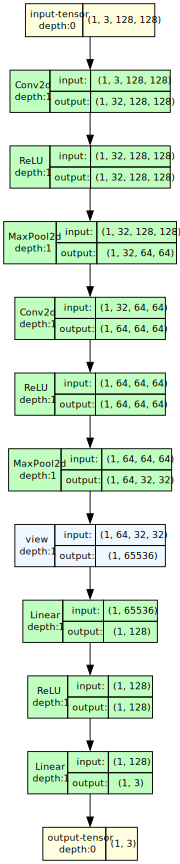

In [41]:
model = CNN()
model_graph = draw_graph(model,input_size=(1,3,128,128))
model_graph.visual_graph

## Evaluation Model

In [42]:
import torch
import torch.optim as optim
model = CNN()
loss_fn=nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(),lr=0.001)
Epochs=20

train_losses=[]
valid_losses=[]

for epoch in range(Epochs):
  model.train()
  train_loss=0.0
  for images,labels in train_loader:
    optimizer.zero_grad()
    outputs=model(images)
    loss = loss_fn(outputs,labels)
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()

  train_losses.append(train_loss / len(train_loader)) #because you want the average loss per batch for the entire training epoch.

  model.eval()
  valid_loss=0.0
  with torch.no_grad():
    for images,labels in valid_loader:
      outputs=model(images)
      loss=loss_fn(outputs,labels)
      valid_loss+=loss.item()

  valid_losses.append(valid_loss/len(valid_loader))
  print(f"Train Loss: {train_loss/len(train_loader):.4f},Valid Loss:{valid_loss/len(valid_loader)}")


Train Loss: 1.4312,Valid Loss:1.121546059846878
Train Loss: 1.0321,Valid Loss:1.252744734287262
Train Loss: 0.9734,Valid Loss:0.9243567287921906
Train Loss: 0.9017,Valid Loss:0.8346747159957886
Train Loss: 0.8363,Valid Loss:0.8169548213481903
Train Loss: 0.7891,Valid Loss:0.9493361711502075
Train Loss: 0.7411,Valid Loss:0.7928579449653625
Train Loss: 0.7669,Valid Loss:1.011245995759964
Train Loss: 0.7039,Valid Loss:0.8340006172657013
Train Loss: 0.6773,Valid Loss:0.7183275520801544
Train Loss: 0.6266,Valid Loss:0.6211161315441132
Train Loss: 0.5980,Valid Loss:0.7870296984910965
Train Loss: 0.6147,Valid Loss:0.7319889813661575
Train Loss: 0.5591,Valid Loss:0.6590168178081512
Train Loss: 0.5542,Valid Loss:0.7098439186811447
Train Loss: 0.5275,Valid Loss:0.7005492150783539
Train Loss: 0.5088,Valid Loss:0.5831729471683502
Train Loss: 0.5070,Valid Loss:0.5614005625247955
Train Loss: 0.4679,Valid Loss:0.5809215605258942
Train Loss: 0.4577,Valid Loss:0.5343014299869537


In [43]:
test_losses=[]
model.eval()
test_loss=0.0
with torch.no_grad():
  for images,labels in test_loader:
    outputs=model(images)
    loss=loss_fn(outputs,labels)
    test_loss+=loss.item()

test_losses.append(test_loss/len(test_loader))
print(f"Test Loss: {test_loss/len(test_loader):.4f}")

Test Loss: 0.3875


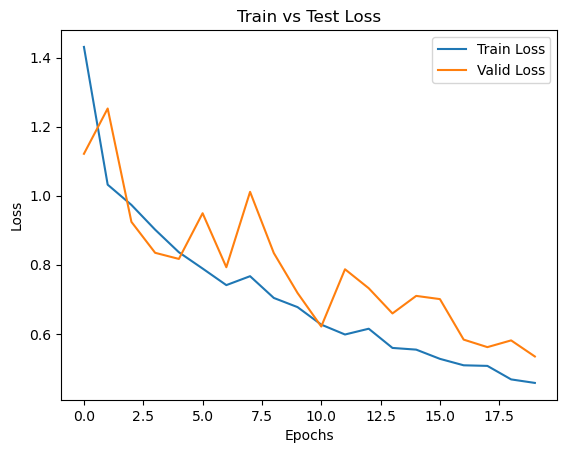

In [44]:
plt.plot(train_losses,label="Train Loss")
plt.plot(valid_losses,label="Valid Loss")
plt.title("Train vs Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       140
           1       0.95      0.67      0.79       107
           2       0.88      0.95      0.92       111

    accuracy                           0.87       358
   macro avg       0.89      0.86      0.86       358
weighted avg       0.88      0.87      0.87       358



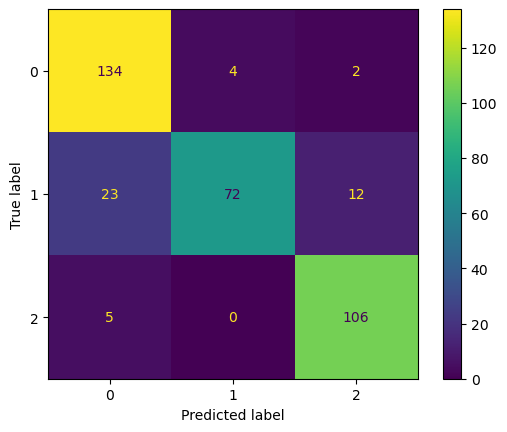

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Accuracy + Precision + Recall + F1
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       1.00      0.53      0.69        17
           2       0.94      0.94      0.94        17

    accuracy                           0.82        51
   macro avg       0.87      0.82      0.81        51
weighted avg       0.87      0.82      0.81        51



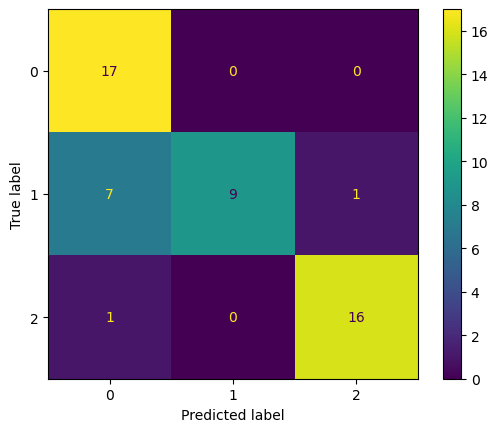

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in valid_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Accuracy + Precision + Recall + F1
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.88      0.94        17
           2       1.00      0.94      0.97        17

    accuracy                           0.94        51
   macro avg       0.95      0.94      0.94        51
weighted avg       0.95      0.94      0.94        51



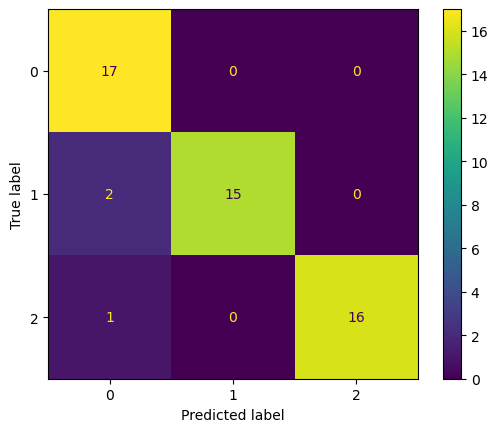

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Accuracy + Precision + Recall + F1
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Images Print

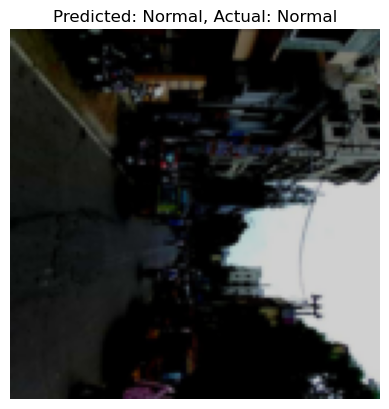

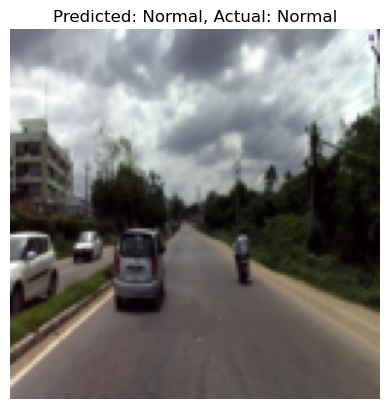

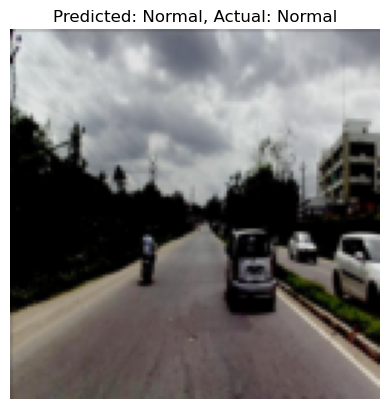

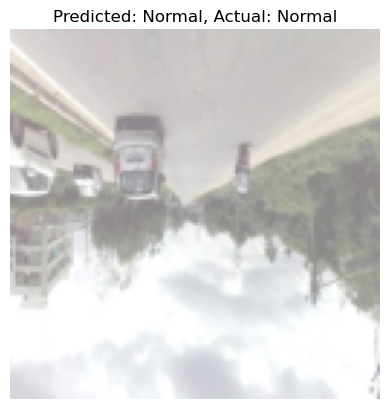

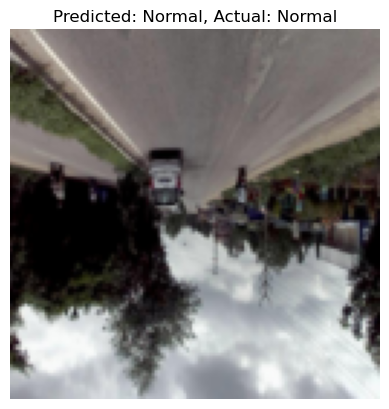

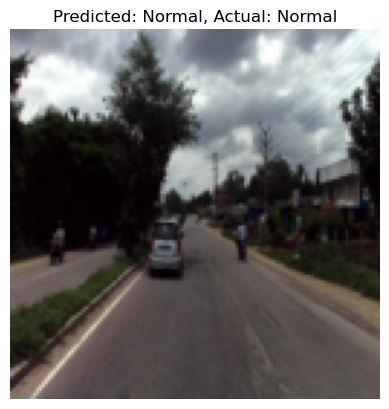

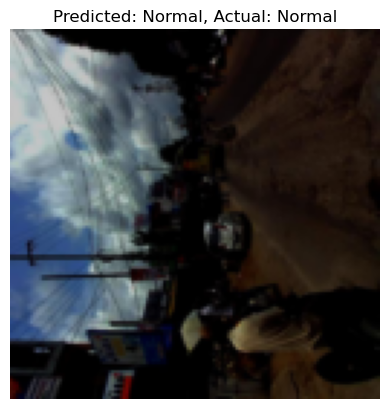

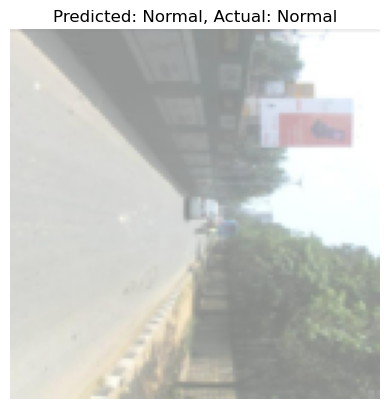

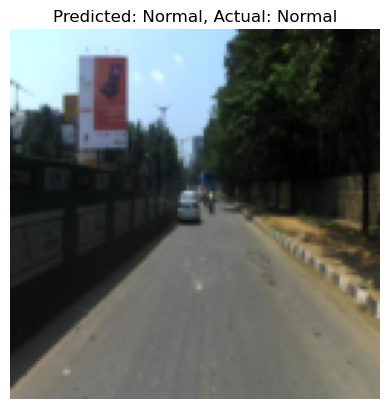

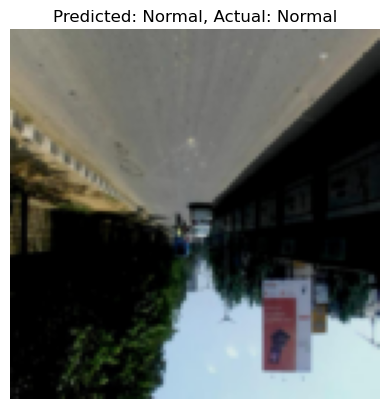

In [48]:
import matplotlib.pyplot as plt
import numpy as np

model.eval()     # Put the model in evaluation mode (disables dropout, uses BatchNorm running stats)

# Take one batch of data from the test loader
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Run the batch through the model
outputs = model(images)
_, preds = torch.max(outputs, 1)   # Get index of highest score for each image

# Human-readable class names
classes = ['Normal', 'Potholes Level 1', 'Potholes Level 2']

# Show first 10 images
for i in range(10):

    # Convert the image tensor to a NumPy array for Matplotlib
    img = images[i].cpu().permute(1, 2, 0).numpy()
    #   .cpu()            → required because NumPy cannot read CUDA tensors
    #   .permute(1,2,0)   → convert CHW (PyTorch format) → HWC (Matplotlib format)

    # Undo normalization: (img * std) + mean
    img = img * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))

    # Display image
    plt.imshow(img)

    # Show predicted vs actual class
    plt.title(f"Predicted: {classes[preds[i]]}, Actual: {classes[labels[i]]}")

    plt.axis('off')  # hide axes for cleaner output
    plt.show()


# NLTK

In [49]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [50]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [52]:
from nltk.corpus import wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):

    text=str(text).lower()
    print(text)

    text = re.sub(r'[^a-zA-Z\s]','',text)
    print(text)

    tokens = word_tokenize(text)
    print(tokens)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    print(tokens)
    
    pos_tags = nltk.pos_tag(tokens)
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word,get_wordnet_pos(tag)) for word,tag in pos_tags]
    print(tokens)
    
    return ' '.join(tokens)

preprocess_text('Happy Birthday Amit Running Sitting')

happy birthday amit running sitting
happy birthday amit running sitting
['happy', 'birthday', 'amit', 'running', 'sitting']
['happy', 'birthday', 'amit', 'running', 'sitting']
['happy', 'birthday', 'amit', 'run', 'sit']


'happy birthday amit run sit'